## Model comparison debugging

In [107]:
arr = np.ones((6, 5, 9))
i3 = (np.arange(9) > 2) & (np.arange(9) < 7)
i2 = np.linspace(0, 4, num=3, dtype=int)
idx2 = np.zeros(5, dtype=bool)
idx2[i2] = True
i23 = np.ix_([0], idx2, i3)
print(arr[i23].shape)
i23

(1, 3, 4)


(array([[[0]]]),
 array([[[0],
         [2],
         [4]]]),
 array([[[3, 4, 5, 6]]]))

In [11]:
l = np.asarray([912, 1350, 1500, 1650, 2000, 2200, 2500, 2800, 3650])
ul = np.asarray([3.5408648e+39, 3.0322014e+39, 2.7879367e+39, 2.1613113e39, 1.8412485e39, 1.6516819e39, 1.6321422e39, 2.3964024e39, 1.9639536e39])
(l*ul).mean(), l.mean()*ul.mean()

(4.482857702511111e+42, 4.814144714241975e+42)

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from astropy.io import fits

In [3]:
obs = fits.open('/mnt/hpc_backup/yanitski/projects/pdr/observational_data/MilkyWay/Planck/regridded/temp/planck_dust_regridded.fits')
obs_error = fits.open('/mnt/hpc_backup/yanitski/projects/pdr/observational_data/MilkyWay/Planck/regridded/temp/planck_dust_regridded_error.fits')
# obs = fits.open('/mnt/hpc_backup/yanitski/projects/pdr/observational_data/MilkyWay/COGAL/regridded/temp/co1_test_regridded.fits')
# obs_error = fits.open('/mnt/hpc_backup/yanitski/projects/pdr/observational_data/MilkyWay/COGAL/regridded/temp/co1_test_regridded_error.fits')
fit = np.load('/mnt/hpc_backup/yanitski/projects/pdr/KT3_history/MilkyWay/fit_results/Planck/planck_dust_regridded/Dust/r400_rcmz0_uv10_loglikelihood.npy')
# fit = np.load('/mnt/hpc_backup/yanitski/projects/pdr/KT3_history/MilkyWay/fit_results/COGAL/co1_test_regridded/CO 1/r400_rcmz0_uv10_chi2.npy')

In [39]:
fits.open('/mnt/hpc_backup/yanitski/projects/pdr/KT3_history/MilkyWay/r400_rcmz0_uv10/channel_intensity.fits')[1].header

XTENSION= 'IMAGE   '           / Image extension                                
BITPIX  =                  -64 / array data type                                
NAXIS   =                    4 / number of array dimensions                     
NAXIS1  =                   20                                                  
NAXIS2  =                  361                                                  
NAXIS3  =                    5                                                  
NAXIS4  =                  701                                                  
PCOUNT  =                    0 / number of parameters                           
GCOUNT  =                    1 / number of groups                               
TYPE    = 'Species transitions'                                                 
BUNIT   = 'K       '                                                            
CTYPE1  = 'Wavelength'                                                          
CUNIT1  = 'm       '        

In [6]:
obs[0].shape, obs_error[0].shape

((701, 181, 361), (1, 181, 361))

In [4]:
(fit==0).any()

True

In [7]:
fit.shape

(1, 701, 361)

In [7]:
fit.max(), fit.min(), np.nanmax(fit), np.nanmin(fit)

(-100.0, -100.0, -100.0, -100.0)

In [4]:
fit.any()

True

In [5]:
(fit==0).any()

False

In [176]:
np.isnan(fit).any()

False

/tmp/ipykernel_1042867/912177046.py:3: RuntimeWarning: divide by zero encountered in log10
  cb = plt.imshow(np.log10(obs[0].data[:, 90, :]), vmin=0.01, vmax=1, cmap='magma')
/tmp/ipykernel_1042867/912177046.py:3: RuntimeWarning: invalid value encountered in log10
  cb = plt.imshow(np.log10(obs[0].data[:, 90, :]), vmin=0.01, vmax=1, cmap='magma')


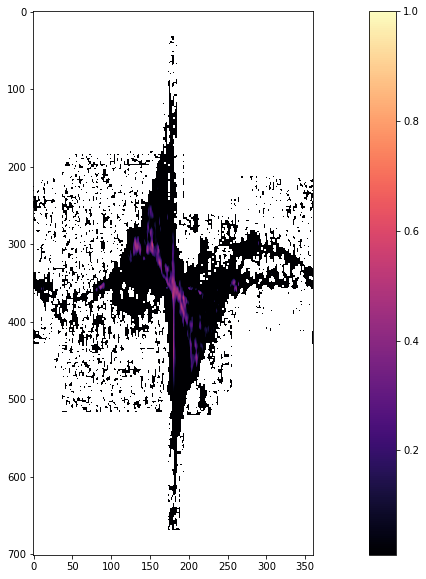

In [12]:
# fit[fit == 0] = np.nan
plt.figure(figsize=(20, 10))
cb = plt.imshow(np.log10(obs[0].data[:, 90, :]), vmin=0.01, vmax=1, cmap='magma')
plt.colorbar(cb)

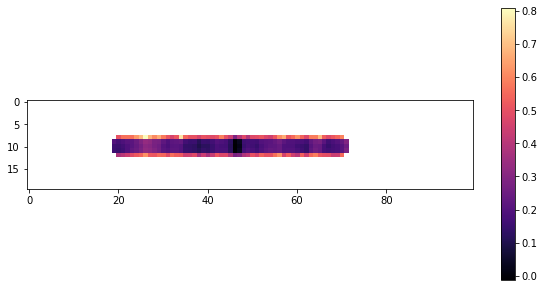

In [30]:
# fit[fit == 0] = np.nan
plt.figure(figsize=(10, 5))
cb = plt.imshow(np.log10(obs_error[0].data[80:100, 100:200]), cmap='magma')
plt.colorbar(cb)

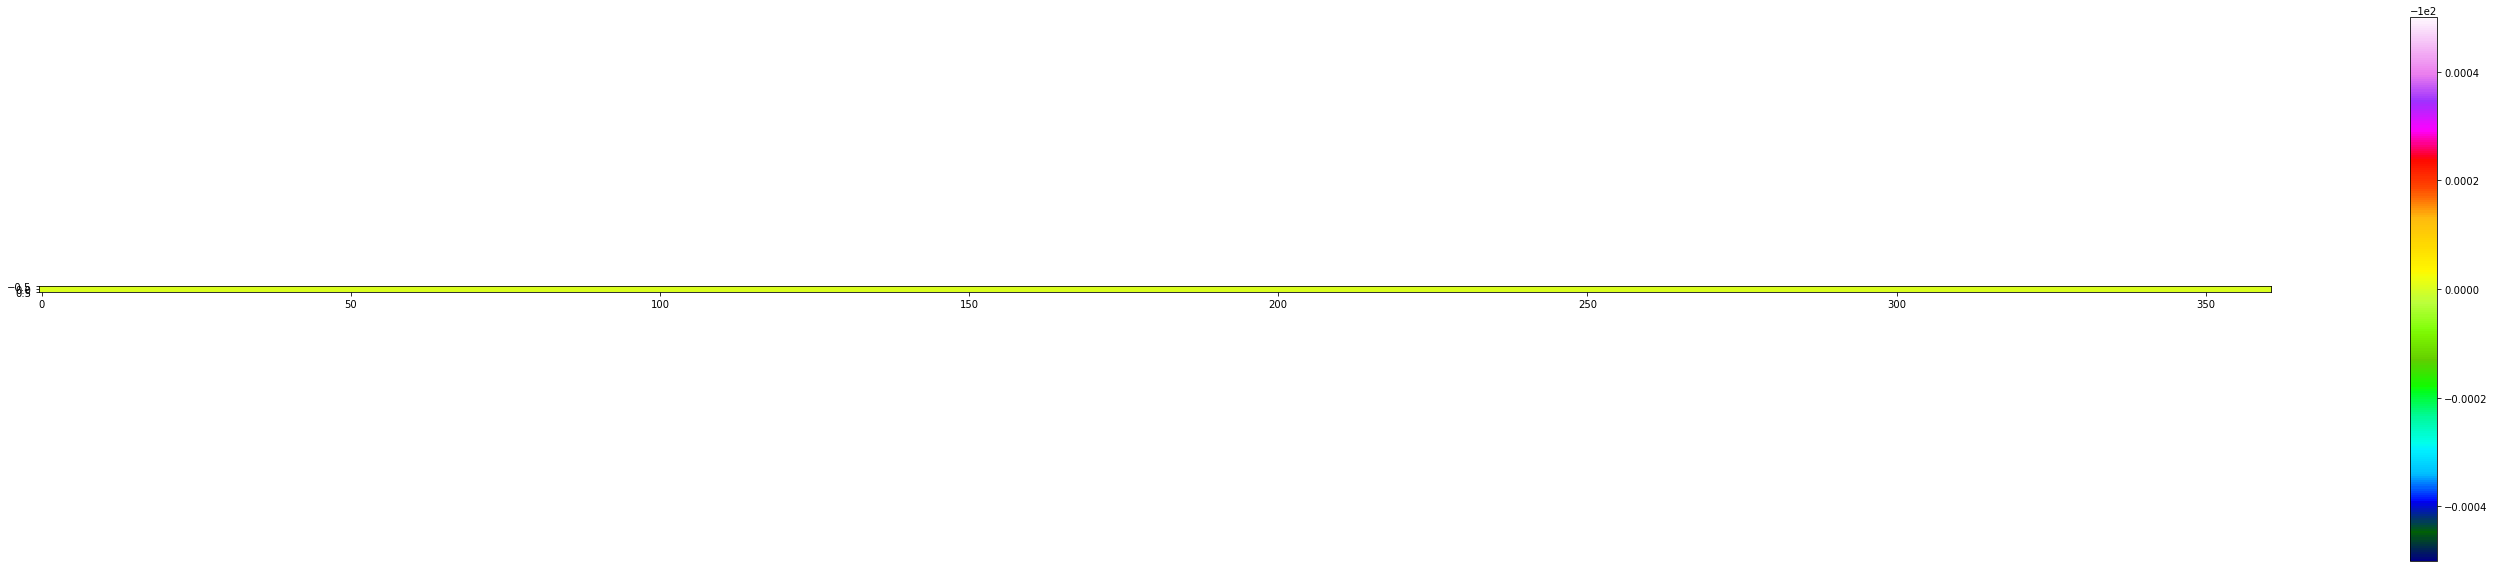

In [14]:
fit[fit == 0] = np.nan
plt.figure(figsize=(50, 10))
cb = plt.imshow(fit[:, :], vmin=-100.0005, vmax=-99.9995, cmap='gist_ncar')
plt.colorbar(cb)

/tmp/ipykernel_1042867/4189907743.py:3: RuntimeWarning: divide by zero encountered in log10
  cb = plt.imshow(np.log10(fit[0, :, :]), cmap='magma')


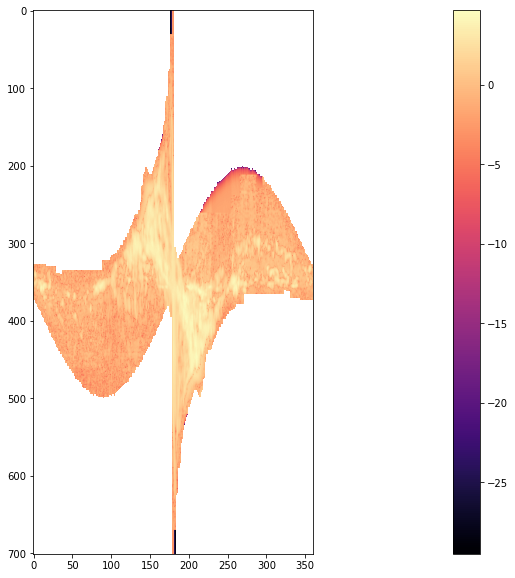

In [11]:
# fit[fit == 0] = np.nan
plt.figure(figsize=(50, 10))
cb = plt.imshow(np.log10(fit[0, :, :]), cmap='magma')
plt.colorbar(cb)

In [3]:
lst = ['one', 'two', 'three']
lst_del = []
for e in lst:
    if 'ee' in e:
        lst.remove(e)
        lst_del.append(e)
lst, lst_del

(['one', 'two'], ['three'])

In [4]:
for i,j in zip(lst, [1, 2]):
    print(i, j)

one 1
two 2


# 

using `kosmatau3d`... (coming soon)

In [ ]:
from kosmatau3d import comparison as comp

path = '/mnt/hpc_backup/yanitski/projects/pdr/observational_data/MilkyWay/'
target_header = {
    'NAXIS': 3,
    'NAXIS1': 361,
    'NAXIS2': 181,
    'NAXIS3': 701,
    'CTYPE1': 'GLON-CAR',
    'CRVAL1': 0,
    'CDELT1': 1,
    'CRPIX1': 181,
    'CTYPE2': 'GLAT-CAR',
    'CRVAL2': 0,
    'CDELT2': 1,
    'CRPIX2': 91,
    'CTYPE3': 'VELO',
    'CRVAL3': 0,
    'CDELT3': 1,
    'CRPIX3': 351,
}
kernel_sigma = 0.5
target_kernel = (
    'gauss1d',
    (kernel_sigma,),
    kernel_sigma*3,
    kernel_sigma/2,
)
mission = ['Mopra']#['COGAL', 'SEDIGISM', 'Mopra', 'ThrUMMS']

In [ ]:
comp.regrid_observations(
    path=path,
    mission='COGAL',
    target_header=target_header,
    target_kernel=target_kernel,
)

In [ ]:
comp.view_observation(
    path=path,
    mission='COGAL',
    regridded_path='/regridded/temp/',
    # regridded_path='/regridded/',
    list_observations=False,
    # regridded_path='',
    # filename='G300.5-12CO_Vfull_regridded.fits',
    #FIRAS HIGH: CO 6, C 2, C+ 1, O 1
    #FIRAS HRES:
    # filename='FIRAS_LINE_EMISSION_MAP_HIGH_regridded.fits',
    # filename='dust_COM_CompMap_dust-commander_0256_R2.00.fits',
    # filename='co1_test_regridded_error.fits',
    filename='co1_test_regridded.fits',
    # filename='13co2_test_regridded_error.fits',
    # filename='13co2_test_regridded.fits',

    # filename='G001_13CO21_Tmb_DR1.fits',
    transition='CO 1',
    plot='integrated',
    integrate_b=[89, 93],
    # i_lat=91,
    # ylabel=r'$I_{CII}$ $(nW \ m^{-2} \ sr^{-1})$',
    clabel=r'$\int T_{B}db$ $(K^\circ)$',
    # title=r'COGAL CO $1 \rightarrow 0$',
    scale=0.5,
    logval=False,
    vmin=-2,
    vmax=100,
    # xlim=[60, 180],
    # ylim=[-200, 200],
    # cmap='gist_ncar',
    cmap='jet',
    save=False,
)

In [ ]:
# Available directories:
# - '/r400_cm{}-{}_d{}_uv{:.0f}/'
#   [[0.25, 0.5, 1.0, 2.0, 4.0], [1.0, 2.0], [0.25, 0.5, 1.0, 2.0, 4.0], [10, 100]]
# - '/r400_fcm{}_ficm{}/'
#   [[0.25, 0.5, 1.0, 2.0, 4.0], [0.25, 0.5, 1.0, 2.0, 4.0]]
# - '/r400_fcm{}_cm{}/'
#   [[0.25, 0.5, 1.0, 2.0, 4.0], ['0_2', '0_3', '1_2', '1_3']]
# - '/r400_ficm{}_icm{}/'
#   [[0.25, 0.5, 1.0, 2.0, 4.0], ['-2', '-2_-1', '-3_-1', '-3_-2']]
# - '/r400_rcmz{:.0f}_uv{}/'
#   [np.arange(0, 3001, 200), [10, 50, 100]]
comp.model_selection(
    mission=None,
    PLOT=False,
    debug=False,
    cmap='viridis',
    model_dir='/r400_rcmz{:.0f}_uv{}/',
    model_param=[np.arange(0, 3001, 200), [10, 50, 100]],
    PRINT=True,
)

In [ ]:
# This should be set to used to create plots of the model comparison for
#  various 2-dimensional grids. For grids with more parameters, the other
#  parameters will be identified via subplots.
comp.plot_comparison(
    file_format='r400_rcmz{:.0f}_uv{}',
    missions=['COBE-FIRAS', 'COGAL'],
    model_param=[np.arange(0, 3001, 200), [10, 50, 100]],
    xlabel=r'$R_{CMZ}$',
    ylabel=r'$f_{FUV}$',
    clabel=r'$log_{10}(\mathcal{L})$'
)

## 

comparison of models with Fixen et al. (1999)...

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from astropy.io import fits
from pprint import pprint
from scipy.io import readsav

[b'CO 1-0' b'CO 2-1' b'CO 3-2' b'O_2' b'CO 4-3' b'C^0 (609)' b'Ortho H_2O'
 b'CO 5-4' b'CO 6-5' b'CO 7-6 +C^0 (370)' b'Para H_2O' b'N^+ (205)'
 b'Para H_2O' b'C^+' b'O_0' b'Si_0' b'N^+' b'CH' b'CO 8-7']
['C+ 1' 'C 1' 'C 2' 'CO 1' 'CO 2' 'CO 3' 'CO 4' 'CO 5' 'CO 6' 'CO 7'
 'CO 8' '13C+ 1' '13C 1' '13C 2' '13CO 1' '13CO 2' '13CO 3' '13CO 4'
 '13CO 5' '13CO 6' '13CO 7' '13CO 8' 'HCO+ 1' 'HCO+ 2' 'HCO+ 3' 'HCO+ 4'
 'HCO+ 5']
(701, 361)


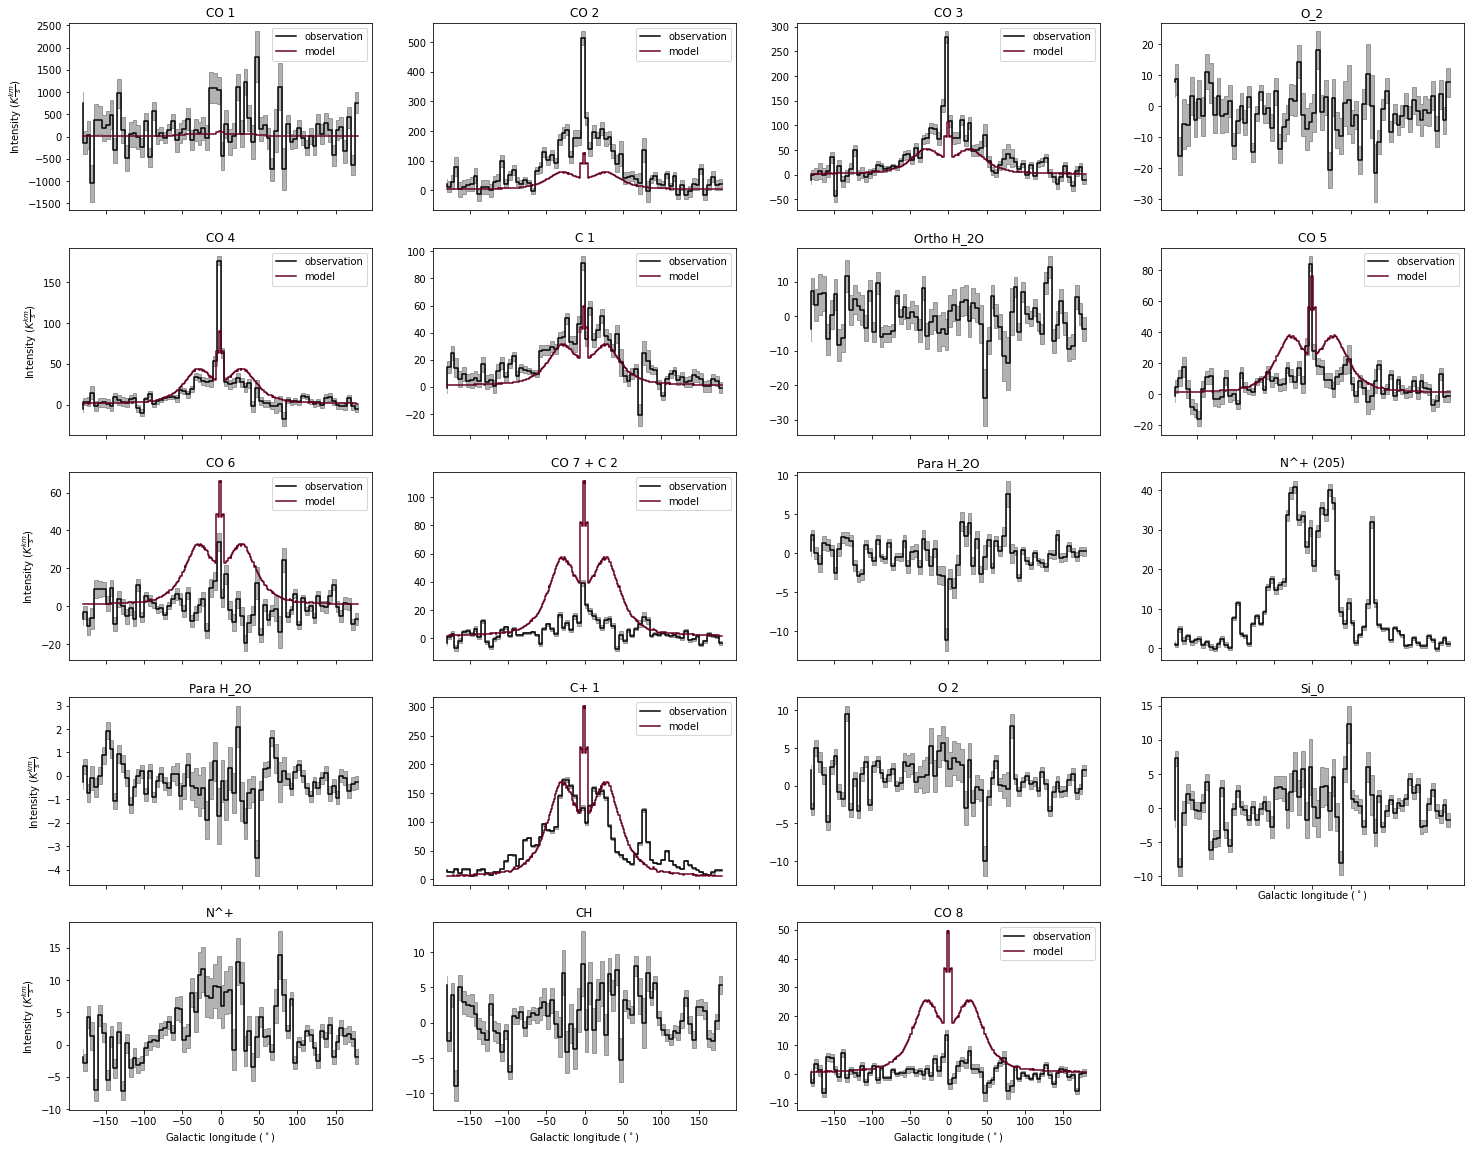

In [6]:
obs = readsav('/mnt/hpc_backup/yanitski/projects/pdr/observational_data/MilkyWay/COBE-FIRAS/regridded/temp/craig.idl')
linfrq = np.array([115.3, 230.5, 345.8, 424.8, 461.0, 492.2, 556.9, 576.3, 691.5, 
                   808.1, 1113, 1460, 2226, 1901, 2060, 2311, 2459, 2589, 921.8])
i2kkms = (2.9979**3) / (linfrq**3 * 2 * 1.3806) * 10 ** 8
obs_line = obs['line']
obs_long = obs['long']
obs_data = obs['amplitude'] * i2kkms
obs_sigma = obs['sigma'] * i2kkms
# intensity_string = r'Intensity $(\frac{nW}{m^2 \ sr})$'
intensity_string = r'Intensity $(K \frac{km}{s})$'
print(obs_line)

model = fits.open('/mnt/hpc_backup/yanitski/projects/pdr/KT3_history/MilkyWay/r500_fuv100/channel_intensity.fits')
model_line = np.asarray(model[1].header['SPECIES'].split(', '))
model_long = np.linspace(model[1].header['CRVAL2'] - model[1].header['CDELT2'] * (model[1].header['CRPIX2'] - 0.5),
                         model[1].header['CRVAL2'] + model[1].header['CDELT2'] * (model[1].header['NAXIS2']-model[1].header['CRPIX2'] - 0.5),
                         num=model[1].header['NAXIS2']) * 180 / np.pi
model_vel = np.linspace(model[1].header['CRVAL4'] - model[1].header['CDELT4'] * (model[1].header['CRPIX4'] - 0.5),
                        model[1].header['CRVAL4'] + model[1].header['CDELT4'] * (model[1].header['NAXIS4']-model[1].header['CRPIX4'] - 0.5),
                        num=model[1].header['NAXIS4'])
i_model_lat = int(model[1].header['CRPIX3'])
print(model_line)

i = np.where(obs_line == b'C^+')[0]
fig, axes = plt.subplots(5, 4, figsize=(25, 20), sharex=True)
# fig.gca(xlabel=r'Galactic longitude $(^\circ)$', ylabel=r'Intensity $(\frac{nW}{m^2 \ sr})$')
axes = axes.flatten()
axes[-1].remove()

for i in range(obs_line.size):
    
    obs_line[i] = obs_line[i].decode('utf-8')
    if obs_line[i] == 'C^0 (609)':
        obs_line[i] = 'C 1'
    if obs_line[i] == 'O_0':
        obs_line[i] = 'O 2'
    elif obs_line[i] == 'C^+':
        obs_line[i] = 'C+ 1'
    elif obs_line[i] == 'CO 7-6 +C^0 (370)':
        obs_line[i] = 'CO 7'
    elif '-' in obs_line[i]:
        obs_line[i] = obs_line[i].split('-')[0]
        
    if i< 19:
        axes[i].step(obs_long, obs_data[:, i], color='xkcd:black', label='observation')
        axes[i].fill_between(obs_long, obs_data[:, i]-obs_sigma[:, i], obs_data[:, i]+obs_sigma[:, i], step='pre', color='xkcd:black', lw=1, alpha=0.3)
    else:
        axes[i].step(obs_long, obs_data.sum(1), color='xkcd:black')
        axes[i].fill_between(obs_long, obs_data.sum(1)-obs_sigma.sum(1), obs_data.sum(1)+obs_sigma.sum(1), step='pre', color='xkcd:black', lw=1, alpha=0.3)
    
    if obs_line[i] in model_line:
        if obs_line[i] == 'CO 7':
            obs_line[i] = 'CO 7 + C 2'
            i_spec = np.where((model_line == 'CO 7') | (model_line == 'C 2'))
            model_data_temp = model[1].data[:, i_model_lat, :, i_spec].sum(1)[0, :, :]
            print(model_data_temp.shape)
        else:
            i_spec = np.where(model_line == obs_line[i])
            model_data_temp = model[1].data[:, i_model_lat, :, i_spec][0, 0, :, :]# - model[2].data[:, i_model_lat, :, 0]
        model_data = np.trapz(model_data_temp, model_vel, axis=0) - model[2].data[0, i_model_lat, :, 0]
        axes[i].step(model_long, model_data, color='xkcd:maroon', alpha=1.0, label='model')
        axes[i].legend()
    
    if i<19:
        axes[i].set_title(obs_line[i])
    else:
        axes[i].set_title('Total IR emission')

axes[16].set_xlabel(r'Galactic longitude $(^\circ)$')
axes[17].set_xlabel(r'Galactic longitude $(^\circ)$')
axes[18].set_xlabel(r'Galactic longitude $(^\circ)$')
axes[15].set_xlabel(r'Galactic longitude $(^\circ)$')
axes[0].set_ylabel(intensity_string)
axes[4].set_ylabel(intensity_string)
axes[8].set_ylabel(intensity_string)
axes[12].set_ylabel(intensity_string)
axes[16].set_ylabel(intensity_string)

plt.show()
plt.savefig('/home/yanitski/projects/pdr/COBE-FIRAS_galactic_plane.png')
plt.close()

In [7]:
lam = np.array([912,1350,1500,1650,2000,2200,2500,2800,3650])
u_l = np.array([3.5408648e39,3.0322014e39,2.7879367e39,2.1613113e39,1.8412485e39,1.6516819e39,1.6321422e39,2.3964024e39,1.9639536e39])
np.trapz(u_l, lam)

6.2469530653e+42

In [19]:
from scipy.interpolate import interp1d

lam = np.array([912,1350,1500,1650,2000,2200,2500,2800,3650])
u_l = np.array([3.5408648e39,3.0322014e39,2.7879367e39,2.1613113e39,1.8412485e39,1.6516819e39,1.6321422e39,2.3964024e39,1.9639536e39])

wav = np.linspace(912, 2066, num=100)
f = interp1d(lam, u_l)
u_interp = f(wav)
np.trapz(u_interp, wav) / (3.086e18)**3/8.95e-14

1.1660529467514766

In [10]:
from kosmatau3d import properties as p

nu = np.linspace(912, 2066, num=10000)
u = p.fuv_models.u_kosma(nu)
np.trapz(u/nu, nu), np.trapz(u/nu, nu)*(3.086e18)**3

(8.950674239147012e-14, 2.630531558503771e+42)

In [24]:
u.mean()

1.1184377947937857e-13

In [25]:
4e-14*1.71 * (-31.02609/3*(2**-3-.912**-3) + 49.92879/4*(2**-4-.912**-4) - 19.90300/5*(2**-5-.912**-5)) + 4.61438e-14/0.7*(2.066**0.7-2**0.7)

8.885117644376916e-14

In [114]:
print()
for p in zip(obs_line, linfrq):
    print('{:^10} {} GHz,'.format(*p))


   CO 1    115.3 GHz,
   CO 2    230.5 GHz,
   CO 3    345.8 GHz,
   O_2     424.8 GHz,
   CO 4    461.0 GHz,
   C 1     492.2 GHz,
Ortho H_2O 556.9 GHz,
   CO 5    576.3 GHz,
   CO 6    691.5 GHz,
CO 7 + C 2 808.1 GHz,
Para H_2O  1113.0 GHz,
N^+ (205)  1460.0 GHz,
Para H_2O  2226.0 GHz,
   C+ 1    1901.0 GHz,
   O_0     2060.0 GHz,
   Si_0    2311.0 GHz,
   N^+     2459.0 GHz,
    CH     2589.0 GHz,
   CO 8    921.8 GHz,


In [31]:
(2.9979**3) * (linfrq[obs_line=='C+ 1']**3) * 2 * 1.38 / 10 ** 8

array([5108.65834486])

In [135]:
arr = np.ones((2, 5, 6))
np.ones_like(arr.shape)

array([1, 1, 1])

## 

...and the same for the other surveys.

In [69]:
import numpy as np
import matplotlib.pyplot as plt

from astropy.io import fits
from pprint import pprint

['CO 1']
['C+ 1' 'C 1' 'C 2' 'CO 1' 'CO 2' 'CO 3' 'CO 4' 'CO 5' 'CO 6' 'CO 7'
 'CO 8' '13C+ 1' '13C 1' '13C 2' '13CO 1' '13CO 2' '13CO 3' '13CO 4'
 '13CO 5' 'HCO+ 1']


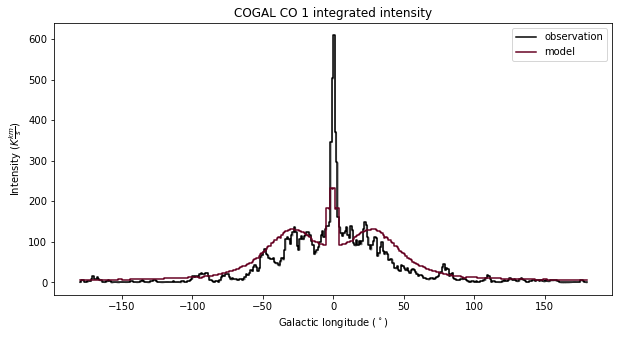

In [93]:
survey = 'COGAL'
lat =0

obs = fits.open('/mnt/hpc_backup/yanitski/projects/pdr/observational_data/MilkyWay/{}/regridded/temp/co1_test_regridded.fits'.format(survey))
obs_lon = np.linspace(obs[0].header['CRVAL1'] - obs[0].header['CDELT1'] * (obs[0].header['CRPIX1'] - 1),
                      obs[0].header['CRVAL1'] + obs[0].header['CDELT1'] * (
                                  obs[0].header['NAXIS1'] - obs[0].header['CRPIX1']),
                      num=obs[0].header['NAXIS1'])
obs_lat = np.linspace(obs[0].header['CRVAL2'] - obs[0].header['CDELT2'] * (obs[0].header['CRPIX2'] - 1),
                      obs[0].header['CRVAL2'] + obs[0].header['CDELT2'] * (
                                  obs[0].header['NAXIS2'] - obs[0].header['CRPIX2']),
                      num=obs[0].header['NAXIS2'])
obs_vel = np.linspace(obs[0].header['CRVAL3'] - obs[0].header['CDELT3'] * (obs[0].header['CRPIX3'] - 1),
                      obs[0].header['CRVAL3'] + obs[0].header['CDELT3'] * (
                                  obs[0].header['NAXIS3'] - obs[0].header['CRPIX3']),
                      num=obs[0].header['NAXIS3'])
i_obs_lat = np.where(np.abs(obs_lat-lat) == np.abs(obs_lat-0).min())[0][0]
obs_sigma = fits.open('/mnt/hpc_backup/yanitski/projects/pdr/observational_data/MilkyWay/{}/regridded/temp/co1_test_regridded_error.fits'.format(survey))[0].data[0, i_obs_lat, :]
obs_line = obs[0].header['TRANSL'].split(', ')
print(obs_line)
obs_data_temp = obs[0].data[:, i_obs_lat, :]
obs_data = np.trapz(obs_data_temp, obs_vel, axis=0)

model = fits.open('/mnt/hpc_backup/yanitski/projects/pdr/KT3_history/MilkyWay/r400_rcmz0_uv10/channel_intensity.fits')
model_line = np.asarray(model[1].header['SPECIES'].split(', '))
model_lon = np.linspace(model[1].header['CRVAL2'] - model[1].header['CDELT2'] * (model[1].header['CRPIX2'] - 0.5),
                         model[1].header['CRVAL2'] + model[1].header['CDELT2'] * (model[1].header['NAXIS2']-model[1].header['CRPIX2'] - 0.5),
                         num=model[1].header['NAXIS2']) * 180 / np.pi
model_lat = np.linspace(model[1].header['CRVAL3'] - model[1].header['CDELT3'] * (model[1].header['CRPIX3'] - 0.5),
                         model[1].header['CRVAL3'] + model[1].header['CDELT3'] * (model[1].header['NAXIS3']-model[1].header['CRPIX3'] - 0.5),
                         num=model[1].header['NAXIS3']) * 180 / np.pi
model_vel = np.linspace(model[1].header['CRVAL4'] - model[1].header['CDELT4'] * (model[1].header['CRPIX4'] - 0.5),
                        model[1].header['CRVAL4'] + model[1].header['CDELT4'] * (model[1].header['NAXIS4']-model[1].header['CRPIX4'] - 0.5),
                        num=model[1].header['NAXIS4'])
i_model_lat = np.where(np.abs(model_lat-lat) == np.abs(model_lat-0).min())[0][0]
print(model_line)
i_spec = np.where(model_line == obs_line)[0][0]
model_data_temp = model[1].data[:, i_model_lat, :, i_spec]
model_data = np.trapz(model_data_temp, model_vel, axis=0) - model[2].data[0, i_model_lat, :, 0]

fig, ax = plt.subplots(1, 1, figsize=(10, 5))

ax.step(obs_lon, obs_data, color='xkcd:black', label='observation')
ax.fill_between(obs_lon, obs_data-obs_sigma, obs_data+obs_sigma, step='pre', color='xkcd:black', lw=1, alpha=0.3)
ax.step(model_lon, model_data, color='xkcd:maroon', alpha=1.0, label='model')

ax.legend()
ax.set_xlabel(r'Galactic longitude $(^\circ)$')
ax.set_ylabel(intensity_string)
ax.set_title('{} {} integrated intensity'.format(survey, obs_line[0]))

plt.show()
plt.savefig('/home/yanitski/projects/pdr/{}_galactic_plane.png'.format(survey))
plt.close()

['CO 1']
['C+ 1' 'C 1' 'C 2' 'CO 1' 'CO 2' 'CO 3' 'CO 4' 'CO 5' 'CO 6' 'CO 7'
 'CO 8' '13C+ 1' '13C 1' '13C 2' '13CO 1' '13CO 2' '13CO 3' '13CO 4'
 '13CO 5' 'HCO+ 1']


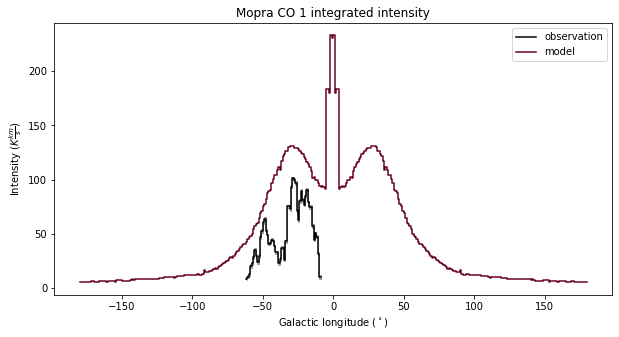

In [94]:
survey = 'Mopra'
lat = 0

obs = fits.open('/mnt/hpc_backup/yanitski/projects/pdr/observational_data/MilkyWay/{}/regridded/temp/co1_test_regridded.fits'.format(survey))
obs_lon = np.linspace(obs[0].header['CRVAL1'] - obs[0].header['CDELT1'] * (obs[0].header['CRPIX1'] - 1),
                      obs[0].header['CRVAL1'] + obs[0].header['CDELT1'] * (
                                  obs[0].header['NAXIS1'] - obs[0].header['CRPIX1']),
                      num=obs[0].header['NAXIS1'])
obs_lat = np.linspace(obs[0].header['CRVAL2'] - obs[0].header['CDELT2'] * (obs[0].header['CRPIX2'] - 1),
                      obs[0].header['CRVAL2'] + obs[0].header['CDELT2'] * (
                                  obs[0].header['NAXIS2'] - obs[0].header['CRPIX2']),
                      num=obs[0].header['NAXIS2'])
obs_vel = np.linspace(obs[0].header['CRVAL3'] - obs[0].header['CDELT3'] * (obs[0].header['CRPIX3'] - 1),
                      obs[0].header['CRVAL3'] + obs[0].header['CDELT3'] * (
                                  obs[0].header['NAXIS3'] - obs[0].header['CRPIX3']),
                      num=obs[0].header['NAXIS3'])
i_obs_lat = np.where(np.abs(obs_lat-lat) == np.abs(obs_lat-0).min())[0][0]
obs_sigma = fits.open('/mnt/hpc_backup/yanitski/projects/pdr/observational_data/MilkyWay/{}/regridded/temp/co1_test_regridded_error.fits'.format(survey))[0].data[i_obs_lat, :]
obs_line = obs[0].header['TRANSL'].split(', ')
print(obs_line)
obs_data_temp = obs[0].data[:, i_obs_lat, :]
obs_data = np.trapz(obs_data_temp, obs_vel, axis=0)

model = fits.open('/mnt/hpc_backup/yanitski/projects/pdr/KT3_history/MilkyWay/r400_rcmz0_uv10/channel_intensity.fits')
model_line = np.asarray(model[1].header['SPECIES'].split(', '))
model_lon = np.linspace(model[1].header['CRVAL2'] - model[1].header['CDELT2'] * (model[1].header['CRPIX2'] - 0.5),
                         model[1].header['CRVAL2'] + model[1].header['CDELT2'] * (model[1].header['NAXIS2']-model[1].header['CRPIX2'] - 0.5),
                         num=model[1].header['NAXIS2']) * 180 / np.pi
model_lat = np.linspace(model[1].header['CRVAL3'] - model[1].header['CDELT3'] * (model[1].header['CRPIX3'] - 0.5),
                         model[1].header['CRVAL3'] + model[1].header['CDELT3'] * (model[1].header['NAXIS3']-model[1].header['CRPIX3'] - 0.5),
                         num=model[1].header['NAXIS3']) * 180 / np.pi
model_vel = np.linspace(model[1].header['CRVAL4'] - model[1].header['CDELT4'] * (model[1].header['CRPIX4'] - 0.5),
                        model[1].header['CRVAL4'] + model[1].header['CDELT4'] * (model[1].header['NAXIS4']-model[1].header['CRPIX4'] - 0.5),
                        num=model[1].header['NAXIS4'])
i_model_lat = np.where(np.abs(model_lat-lat) == np.abs(model_lat-0).min())[0][0]
print(model_line)
i_spec = np.where(model_line == obs_line)[0][0]
model_data_temp = model[1].data[:, i_model_lat, :, i_spec]
model_data = np.trapz(model_data_temp, model_vel, axis=0) - model[2].data[0, i_model_lat, :, 0]

fig, ax = plt.subplots(1, 1, figsize=(10, 5))

ax.step(obs_lon, obs_data, color='xkcd:black', label='observation')
ax.fill_between(obs_lon, obs_data-obs_sigma, obs_data+obs_sigma, step='pre', color='xkcd:black', lw=1, alpha=0.3)
ax.step(model_lon, model_data, color='xkcd:maroon', alpha=1.0, label='model')

ax.legend()
ax.set_xlabel(r'Galactic longitude $(^\circ)$')
ax.set_ylabel(intensity_string)
ax.set_title('{} {} integrated intensity'.format(survey, obs_line[0]))

plt.show()
plt.savefig('/home/yanitski/projects/pdr/{}_galactic_plane.png'.format(survey))
plt.close()

['13CO 1']
['C+ 1' 'C 1' 'C 2' 'CO 1' 'CO 2' 'CO 3' 'CO 4' 'CO 5' 'CO 6' 'CO 7'
 'CO 8' '13C+ 1' '13C 1' '13C 2' '13CO 1' '13CO 2' '13CO 3' '13CO 4'
 '13CO 5' 'HCO+ 1']


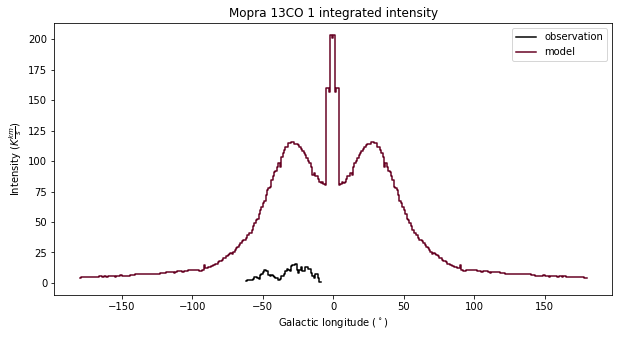

In [96]:
survey = 'Mopra'
lat = 0

obs = fits.open('/mnt/hpc_backup/yanitski/projects/pdr/observational_data/MilkyWay/{}/regridded/temp/13co1_test_regridded.fits'.format(survey))
obs_lon = np.linspace(obs[0].header['CRVAL1'] - obs[0].header['CDELT1'] * (obs[0].header['CRPIX1'] - 1),
                      obs[0].header['CRVAL1'] + obs[0].header['CDELT1'] * (
                                  obs[0].header['NAXIS1'] - obs[0].header['CRPIX1']),
                      num=obs[0].header['NAXIS1'])
obs_lat = np.linspace(obs[0].header['CRVAL2'] - obs[0].header['CDELT2'] * (obs[0].header['CRPIX2'] - 1),
                      obs[0].header['CRVAL2'] + obs[0].header['CDELT2'] * (
                                  obs[0].header['NAXIS2'] - obs[0].header['CRPIX2']),
                      num=obs[0].header['NAXIS2'])
obs_vel = np.linspace(obs[0].header['CRVAL3'] - obs[0].header['CDELT3'] * (obs[0].header['CRPIX3'] - 1),
                      obs[0].header['CRVAL3'] + obs[0].header['CDELT3'] * (
                                  obs[0].header['NAXIS3'] - obs[0].header['CRPIX3']),
                      num=obs[0].header['NAXIS3'])
i_obs_lat = np.where(np.abs(obs_lat-lat) == np.abs(obs_lat-0).min())[0][0]
obs_sigma = fits.open('/mnt/hpc_backup/yanitski/projects/pdr/observational_data/MilkyWay/{}/regridded/temp/13co1_test_regridded_error.fits'.format(survey))[0].data[i_obs_lat, :]
obs_line = obs[0].header['TRANSL'].split(', ')
print(obs_line)
obs_data_temp = obs[0].data[:, i_obs_lat, :]
obs_data = np.trapz(obs_data_temp, obs_vel, axis=0)

model = fits.open('/mnt/hpc_backup/yanitski/projects/pdr/KT3_history/MilkyWay/r400_rcmz0_uv10/channel_intensity.fits')
model_line = np.asarray(model[1].header['SPECIES'].split(', '))
model_lon = np.linspace(model[1].header['CRVAL2'] - model[1].header['CDELT2'] * (model[1].header['CRPIX2'] - 0.5),
                         model[1].header['CRVAL2'] + model[1].header['CDELT2'] * (model[1].header['NAXIS2']-model[1].header['CRPIX2'] - 0.5),
                         num=model[1].header['NAXIS2']) * 180 / np.pi
model_lat = np.linspace(model[1].header['CRVAL3'] - model[1].header['CDELT3'] * (model[1].header['CRPIX3'] - 0.5),
                         model[1].header['CRVAL3'] + model[1].header['CDELT3'] * (model[1].header['NAXIS3']-model[1].header['CRPIX3'] - 0.5),
                         num=model[1].header['NAXIS3']) * 180 / np.pi
model_vel = np.linspace(model[1].header['CRVAL4'] - model[1].header['CDELT4'] * (model[1].header['CRPIX4'] - 0.5),
                        model[1].header['CRVAL4'] + model[1].header['CDELT4'] * (model[1].header['NAXIS4']-model[1].header['CRPIX4'] - 0.5),
                        num=model[1].header['NAXIS4'])
i_model_lat = np.where(np.abs(model_lat-lat) == np.abs(model_lat-0).min())[0][0]
print(model_line)
i_spec = np.where(model_line == obs_line)[0][0]
model_data_temp = model[1].data[:, i_model_lat, :, i_spec]
model_data = np.trapz(model_data_temp, model_vel, axis=0) - model[2].data[0, i_model_lat, :, 0]

fig, ax = plt.subplots(1, 1, figsize=(10, 5))

ax.step(obs_lon, obs_data, color='xkcd:black', label='observation')
ax.fill_between(obs_lon, obs_data-obs_sigma, obs_data+obs_sigma, step='pre', color='xkcd:black', lw=1, alpha=0.3)
ax.step(model_lon, model_data, color='xkcd:maroon', alpha=1.0, label='model')

ax.legend()
ax.set_xlabel(r'Galactic longitude $(^\circ)$')
ax.set_ylabel(intensity_string)
ax.set_title('{} {} integrated intensity'.format(survey, obs_line[0]))

plt.show()
plt.savefig('/home/yanitski/projects/pdr/{}_galactic_plane.png'.format(survey))
plt.close()

['CO 1']
['C+ 1' 'C 1' 'C 2' 'CO 1' 'CO 2' 'CO 3' 'CO 4' 'CO 5' 'CO 6' 'CO 7'
 'CO 8' '13C+ 1' '13C 1' '13C 2' '13CO 1' '13CO 2' '13CO 3' '13CO 4'
 '13CO 5' 'HCO+ 1']


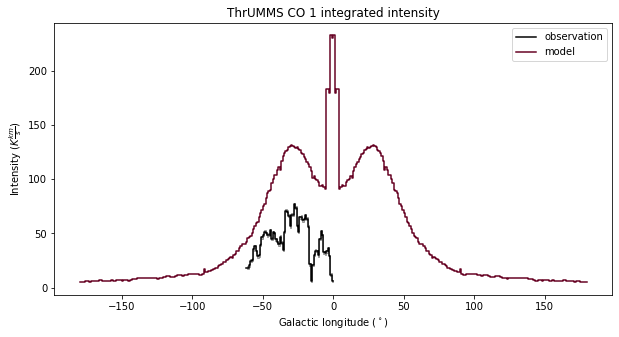

In [98]:
survey = 'ThrUMMS'
lat = 0

obs = fits.open('/mnt/hpc_backup/yanitski/projects/pdr/observational_data/MilkyWay/{}/regridded/temp/co1_test_regridded.fits'.format(survey))
obs_lon = np.linspace(obs[0].header['CRVAL1'] - obs[0].header['CDELT1'] * (obs[0].header['CRPIX1'] - 1),
                      obs[0].header['CRVAL1'] + obs[0].header['CDELT1'] * (
                                  obs[0].header['NAXIS1'] - obs[0].header['CRPIX1']),
                      num=obs[0].header['NAXIS1'])
obs_lat = np.linspace(obs[0].header['CRVAL2'] - obs[0].header['CDELT2'] * (obs[0].header['CRPIX2'] - 1),
                      obs[0].header['CRVAL2'] + obs[0].header['CDELT2'] * (
                                  obs[0].header['NAXIS2'] - obs[0].header['CRPIX2']),
                      num=obs[0].header['NAXIS2'])
obs_vel = np.linspace(obs[0].header['CRVAL3'] - obs[0].header['CDELT3'] * (obs[0].header['CRPIX3'] - 1),
                      obs[0].header['CRVAL3'] + obs[0].header['CDELT3'] * (
                                  obs[0].header['NAXIS3'] - obs[0].header['CRPIX3']),
                      num=obs[0].header['NAXIS3'])
i_obs_lat = np.where(np.abs(obs_lat-lat) == np.abs(obs_lat-0).min())[0][0]
obs_sigma = fits.open('/mnt/hpc_backup/yanitski/projects/pdr/observational_data/MilkyWay/{}/regridded/temp/co1_test_regridded_error.fits'.format(survey))[0].data[0, i_obs_lat, :]
obs_line = obs[0].header['TRANSL'].split(', ')
print(obs_line)
obs_data_temp = obs[0].data[:, i_obs_lat, :]
obs_data = np.trapz(obs_data_temp, obs_vel, axis=0)

model = fits.open('/mnt/hpc_backup/yanitski/projects/pdr/KT3_history/MilkyWay/r400_rcmz0_uv10/channel_intensity.fits')
model_line = np.asarray(model[1].header['SPECIES'].split(', '))
model_lon = np.linspace(model[1].header['CRVAL2'] - model[1].header['CDELT2'] * (model[1].header['CRPIX2'] - 0.5),
                         model[1].header['CRVAL2'] + model[1].header['CDELT2'] * (model[1].header['NAXIS2']-model[1].header['CRPIX2'] - 0.5),
                         num=model[1].header['NAXIS2']) * 180 / np.pi
model_lat = np.linspace(model[1].header['CRVAL3'] - model[1].header['CDELT3'] * (model[1].header['CRPIX3'] - 0.5),
                         model[1].header['CRVAL3'] + model[1].header['CDELT3'] * (model[1].header['NAXIS3']-model[1].header['CRPIX3'] - 0.5),
                         num=model[1].header['NAXIS3']) * 180 / np.pi
model_vel = np.linspace(model[1].header['CRVAL4'] - model[1].header['CDELT4'] * (model[1].header['CRPIX4'] - 0.5),
                        model[1].header['CRVAL4'] + model[1].header['CDELT4'] * (model[1].header['NAXIS4']-model[1].header['CRPIX4'] - 0.5),
                        num=model[1].header['NAXIS4'])
i_model_lat = np.where(np.abs(model_lat-lat) == np.abs(model_lat-0).min())[0][0]
print(model_line)
i_spec = np.where(model_line == obs_line)[0][0]
model_data_temp = model[1].data[:, i_model_lat, :, i_spec]
model_data = np.trapz(model_data_temp, model_vel, axis=0) - model[2].data[0, i_model_lat, :, 0]

fig, ax = plt.subplots(1, 1, figsize=(10, 5))

ax.step(obs_lon, obs_data, color='xkcd:black', label='observation')
ax.fill_between(obs_lon, obs_data-obs_sigma, obs_data+obs_sigma, step='pre', color='xkcd:black', lw=1, alpha=0.3)
ax.step(model_lon, model_data, color='xkcd:maroon', alpha=1.0, label='model')

ax.legend()
ax.set_xlabel(r'Galactic longitude $(^\circ)$')
ax.set_ylabel(intensity_string)
ax.set_title('{} {} integrated intensity'.format(survey, obs_line[0]))

plt.show()
plt.savefig('/home/yanitski/projects/pdr/{}_galactic_plane.png'.format(survey))
plt.close()

['13CO 1']
['C+ 1' 'C 1' 'C 2' 'CO 1' 'CO 2' 'CO 3' 'CO 4' 'CO 5' 'CO 6' 'CO 7'
 'CO 8' '13C+ 1' '13C 1' '13C 2' '13CO 1' '13CO 2' '13CO 3' '13CO 4'
 '13CO 5' 'HCO+ 1']


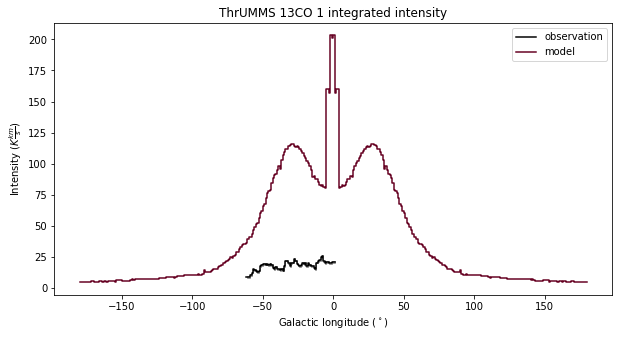

In [99]:
survey = 'ThrUMMS'
lat = 0

obs = fits.open('/mnt/hpc_backup/yanitski/projects/pdr/observational_data/MilkyWay/{}/regridded/temp/13co1_test_regridded.fits'.format(survey))
obs_lon = np.linspace(obs[0].header['CRVAL1'] - obs[0].header['CDELT1'] * (obs[0].header['CRPIX1'] - 1),
                      obs[0].header['CRVAL1'] + obs[0].header['CDELT1'] * (
                                  obs[0].header['NAXIS1'] - obs[0].header['CRPIX1']),
                      num=obs[0].header['NAXIS1'])
obs_lat = np.linspace(obs[0].header['CRVAL2'] - obs[0].header['CDELT2'] * (obs[0].header['CRPIX2'] - 1),
                      obs[0].header['CRVAL2'] + obs[0].header['CDELT2'] * (
                                  obs[0].header['NAXIS2'] - obs[0].header['CRPIX2']),
                      num=obs[0].header['NAXIS2'])
obs_vel = np.linspace(obs[0].header['CRVAL3'] - obs[0].header['CDELT3'] * (obs[0].header['CRPIX3'] - 1),
                      obs[0].header['CRVAL3'] + obs[0].header['CDELT3'] * (
                                  obs[0].header['NAXIS3'] - obs[0].header['CRPIX3']),
                      num=obs[0].header['NAXIS3'])
i_obs_lat = np.where(np.abs(obs_lat-lat) == np.abs(obs_lat-0).min())[0][0]
obs_sigma = fits.open('/mnt/hpc_backup/yanitski/projects/pdr/observational_data/MilkyWay/{}/regridded/temp/13co1_test_regridded_error.fits'.format(survey))[0].data[0, i_obs_lat, :]
obs_line = obs[0].header['TRANSL'].split(', ')
print(obs_line)
obs_data_temp = obs[0].data[:, i_obs_lat, :]
obs_data = np.trapz(obs_data_temp, obs_vel, axis=0)

model = fits.open('/mnt/hpc_backup/yanitski/projects/pdr/KT3_history/MilkyWay/r400_rcmz0_uv10/channel_intensity.fits')
model_line = np.asarray(model[1].header['SPECIES'].split(', '))
model_lon = np.linspace(model[1].header['CRVAL2'] - model[1].header['CDELT2'] * (model[1].header['CRPIX2'] - 0.5),
                         model[1].header['CRVAL2'] + model[1].header['CDELT2'] * (model[1].header['NAXIS2']-model[1].header['CRPIX2'] - 0.5),
                         num=model[1].header['NAXIS2']) * 180 / np.pi
model_lat = np.linspace(model[1].header['CRVAL3'] - model[1].header['CDELT3'] * (model[1].header['CRPIX3'] - 0.5),
                         model[1].header['CRVAL3'] + model[1].header['CDELT3'] * (model[1].header['NAXIS3']-model[1].header['CRPIX3'] - 0.5),
                         num=model[1].header['NAXIS3']) * 180 / np.pi
model_vel = np.linspace(model[1].header['CRVAL4'] - model[1].header['CDELT4'] * (model[1].header['CRPIX4'] - 0.5),
                        model[1].header['CRVAL4'] + model[1].header['CDELT4'] * (model[1].header['NAXIS4']-model[1].header['CRPIX4'] - 0.5),
                        num=model[1].header['NAXIS4'])
i_model_lat = np.where(np.abs(model_lat-lat) == np.abs(model_lat-0).min())[0][0]
print(model_line)
i_spec = np.where(model_line == obs_line)[0][0]
model_data_temp = model[1].data[:, i_model_lat, :, i_spec]
model_data = np.trapz(model_data_temp, model_vel, axis=0) - model[2].data[0, i_model_lat, :, 0]

fig, ax = plt.subplots(1, 1, figsize=(10, 5))

ax.step(obs_lon, obs_data, color='xkcd:black', label='observation')
ax.fill_between(obs_lon, obs_data-obs_sigma, obs_data+obs_sigma, step='pre', color='xkcd:black', lw=1, alpha=0.3)
ax.step(model_lon, model_data, color='xkcd:maroon', alpha=1.0, label='model')

ax.legend()
ax.set_xlabel(r'Galactic longitude $(^\circ)$')
ax.set_ylabel(intensity_string)
ax.set_title('{} {} integrated intensity'.format(survey, obs_line[0]))

plt.show()
plt.savefig('/home/yanitski/projects/pdr/{}_galactic_plane.png'.format(survey))
plt.close()

['13CO 2']
['C+ 1' 'C 1' 'C 2' 'CO 1' 'CO 2' 'CO 3' 'CO 4' 'CO 5' 'CO 6' 'CO 7'
 'CO 8' '13C+ 1' '13C 1' '13C 2' '13CO 1' '13CO 2' '13CO 3' '13CO 4'
 '13CO 5' 'HCO+ 1']


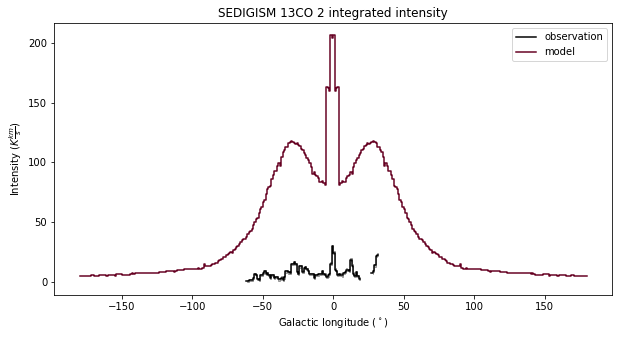

In [116]:
survey = 'SEDIGISM'
lat = 0

obs = fits.open('/mnt/hpc_backup/yanitski/projects/pdr/observational_data/MilkyWay/{}/regridded/temp/13co2_test_regridded.fits'.format(survey))
obs_lon = np.linspace(obs[0].header['CRVAL1'] - obs[0].header['CDELT1'] * (obs[0].header['CRPIX1'] - 1),
                      obs[0].header['CRVAL1'] + obs[0].header['CDELT1'] * (
                                  obs[0].header['NAXIS1'] - obs[0].header['CRPIX1']),
                      num=obs[0].header['NAXIS1'])
obs_lat = np.linspace(obs[0].header['CRVAL2'] - obs[0].header['CDELT2'] * (obs[0].header['CRPIX2'] - 1),
                      obs[0].header['CRVAL2'] + obs[0].header['CDELT2'] * (
                                  obs[0].header['NAXIS2'] - obs[0].header['CRPIX2']),
                      num=obs[0].header['NAXIS2'])
obs_vel = np.linspace(obs[0].header['CRVAL3'] - obs[0].header['CDELT3'] * (obs[0].header['CRPIX3'] - 1),
                      obs[0].header['CRVAL3'] + obs[0].header['CDELT3'] * (
                                  obs[0].header['NAXIS3'] - obs[0].header['CRPIX3']),
                      num=obs[0].header['NAXIS3'])
i_obs_lat = np.where(np.abs(obs_lat-lat) == np.abs(obs_lat-0).min())[0][0]
obs_sigma = fits.open('/mnt/hpc_backup/yanitski/projects/pdr/observational_data/MilkyWay/{}/regridded/temp/13co2_test_regridded_error.fits'.format(survey))[0].data[i_obs_lat, :]
obs_line = obs[0].header['TRANSL'].split(', ')
print(obs_line)
obs_data_temp = obs[0].data[:, i_obs_lat, :]
obs_data = np.trapz(obs_data_temp, obs_vel, axis=0)

model = fits.open('/mnt/hpc_backup/yanitski/projects/pdr/KT3_history/MilkyWay/r400_rcmz0_uv10/channel_intensity.fits')
model_line = np.asarray(model[1].header['SPECIES'].split(', '))
model_lon = np.linspace(model[1].header['CRVAL2'] - model[1].header['CDELT2'] * (model[1].header['CRPIX2'] - 0.5),
                         model[1].header['CRVAL2'] + model[1].header['CDELT2'] * (model[1].header['NAXIS2']-model[1].header['CRPIX2'] - 0.5),
                         num=model[1].header['NAXIS2']) * 180 / np.pi
model_lat = np.linspace(model[1].header['CRVAL3'] - model[1].header['CDELT3'] * (model[1].header['CRPIX3'] - 0.5),
                         model[1].header['CRVAL3'] + model[1].header['CDELT3'] * (model[1].header['NAXIS3']-model[1].header['CRPIX3'] - 0.5),
                         num=model[1].header['NAXIS3']) * 180 / np.pi
model_vel = np.linspace(model[1].header['CRVAL4'] - model[1].header['CDELT4'] * (model[1].header['CRPIX4'] - 0.5),
                        model[1].header['CRVAL4'] + model[1].header['CDELT4'] * (model[1].header['NAXIS4']-model[1].header['CRPIX4'] - 0.5),
                        num=model[1].header['NAXIS4'])
i_model_lat = np.where(np.abs(model_lat-lat) == np.abs(model_lat-0).min())[0][0]
print(model_line)
i_spec = np.where(model_line == obs_line)[0][0]
model_data_temp = model[1].data[:, i_model_lat, :, i_spec]
model_data = np.trapz(model_data_temp, model_vel, axis=0) - model[2].data[0, i_model_lat, :, 0]

fig, ax = plt.subplots(1, 1, figsize=(10, 5))

ax.step(obs_lon, obs_data, color='xkcd:black', label='observation')
ax.fill_between(obs_lon, obs_data-obs_sigma, obs_data+obs_sigma, step='pre', color='xkcd:black', lw=1, alpha=0.3)
ax.step(model_lon, model_data, color='xkcd:maroon', alpha=1.0, label='model')

ax.legend()
ax.set_xlabel(r'Galactic longitude $(^\circ)$')
ax.set_ylabel(intensity_string)
ax.set_title('{} {} integrated intensity'.format(survey, obs_line[0]))

plt.show()
plt.savefig('/home/yanitski/projects/pdr/{}_galactic_plane.png'.format(survey))
plt.close()

In [89]:
fits.open('/mnt/hpc_backup/yanitski/projects/pdr/observational_data/MilkyWay/{}/regridded/temp/co1_test_regridded_error.fits'.format(survey))[0].shape

(701, 181, 361)